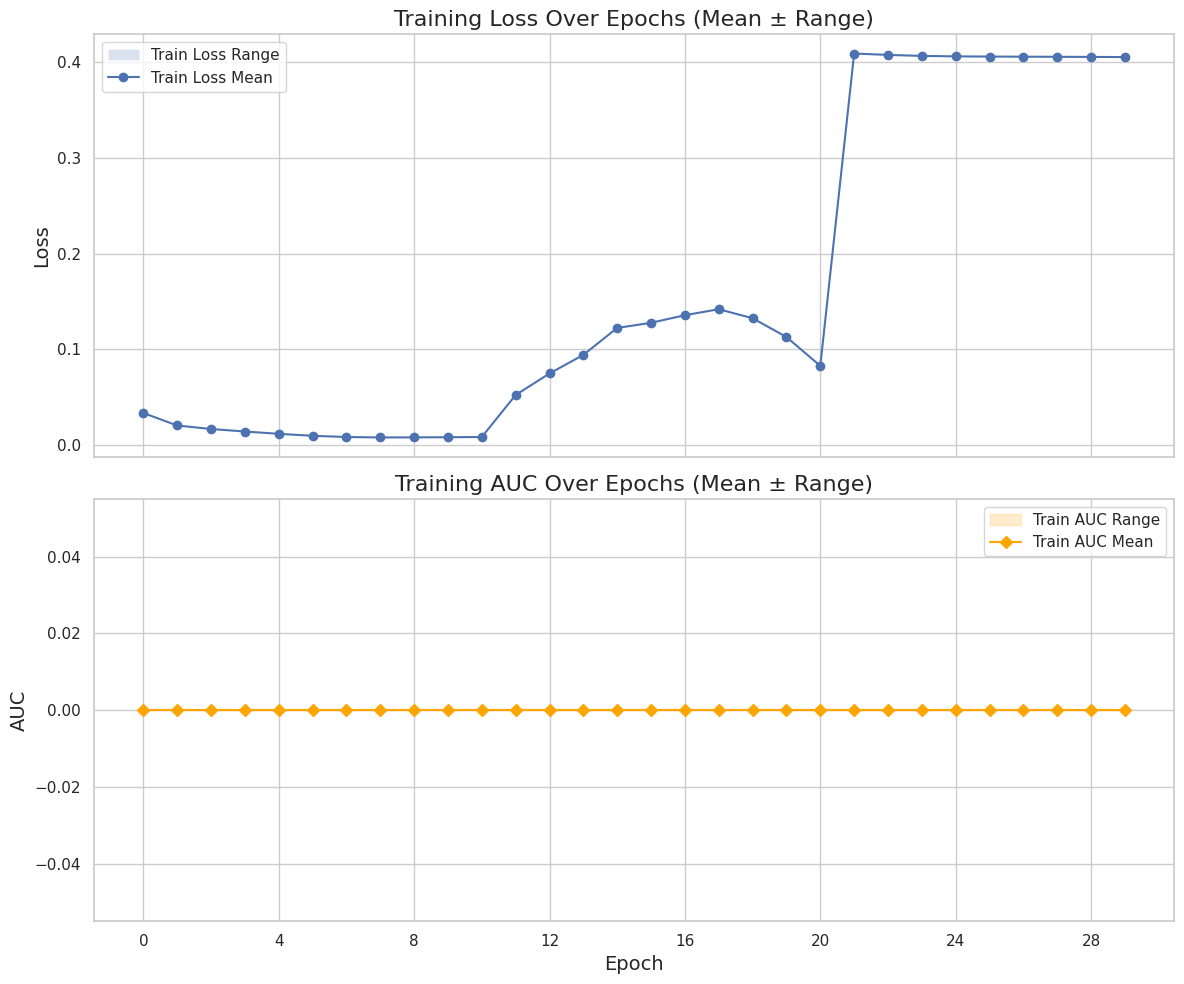

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator

# Load the data
file_path = 'val_loss_log_concat.npy'
data = np.load(file_path, allow_pickle=True)

# Convert to DataFrame
df = pd.DataFrame(data[1:], columns=data[0])  # skip header row

# Convert data types
df['epoch'] = df['epoch'].astype(float)
df['train_loss'] = df['train_loss'].astype(float)
df['train_auc'] = df['train_auc'].astype(float)

# Set style
sns.set(style="whitegrid")

# Aggregate statistics for train_loss and train_auc only
summary = df.groupby('epoch').agg({
    'train_loss': ['min', 'max', 'mean'],
    'train_auc': ['min', 'max', 'mean']
}).reset_index()
summary.columns = ['epoch', 'train_loss_min', 'train_loss_max', 'train_loss_mean',
                   'train_auc_min', 'train_auc_max', 'train_auc_mean']

# Plot with range shading
fig, axs = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Train Loss Plot
axs[0].fill_between(summary['epoch'], summary['train_loss_min'], summary['train_loss_max'],
                    alpha=0.2, label='Train Loss Range', zorder=1)
axs[0].plot(summary['epoch'], summary['train_loss_mean'], marker='o',
            label='Train Loss Mean', zorder=2)

axs[0].set_title('Training Loss Over Epochs (Mean ± Range)', fontsize=16)
axs[0].set_ylabel('Loss', fontsize=14)
axs[0].yaxis.set_major_locator(MaxNLocator(nbins=5))
axs[0].legend()

# Train AUC Plot
axs[1].fill_between(summary['epoch'], summary['train_auc_min'], summary['train_auc_max'],
                    alpha=0.2, color='orange', label='Train AUC Range', zorder=1)
axs[1].plot(summary['epoch'], summary['train_auc_mean'], marker='D',
            color='orange', label='Train AUC Mean', zorder=2)

axs[1].set_title('Training AUC Over Epochs (Mean ± Range)', fontsize=16)
axs[1].set_xlabel('Epoch', fontsize=14)
axs[1].set_ylabel('AUC', fontsize=14)
axs[1].xaxis.set_major_locator(MaxNLocator(integer=True))
axs[1].legend()

plt.tight_layout()
plt.show()


In [1]:
import numpy as np
v0 = np.load('/home/cele/다운로드/val_loss_log1.npy')
v1 = np.load('/home/cele/다운로드/val_loss_log2.npy')

vf = np.concatenate([v0, v1])
np.save('val_loss_log_concat.npy', vf)

In [21]:
data = [['epoch', 'train_loss', 'train_auc'],
 ['0.0', '0.03328419317364354', '0.0'],
 ['1.0', '0.020180966732600197', '0.0'],
 ['2.0', '0.016508143821688876', '0.0'],
 ['3.0', '0.013893931883979927', '0.0'],
 ['4.0', '0.011478029904802414', '0.0'],
 ['5.0', '0.009400878000517629', '0.0'],
 ['6.0', '0.008151135539149187', '0.0'],
 ['7.0', '0.007703491899618794', '0.0'],
 ['8.0', '0.007755879421760752', '0.0'],
 ['9.0', '0.007918871511355974', '0.0'],
 ['10.0', '0.008150369020454077', '0.0'],
 ['11.0', '0.052087974504419515', '0.0'],
 ['12.0', '0.07459569929421625', '0.0'],
 ['13.0', '0.09403303106188435', '0.0'],
 ['14.0', '0.12223702310637402', '0.0'],
 ['15.0', '0.12758219016779385', '0.0'],
 ['16.0', '0.13554840815645133', '0.0'],
 ['17.0', '0.14178793414718133', '0.0'],
 ['18.0', '0.13236038914738774', '0.0'],
 ['19.0', '0.11274247897275597', '0.0'],
 ['20.0', '0.08256555355963593', '0.0'],
 ['21.0', '0.4092201757733304', '0.0'],
 ['22.0', '0.40776749160701614', '0.0'],
 ['23.0', '0.4067332037324573', '0.0'],
 ['24.0', '0.40625396137097747', '0.0'],
 ['25.0', '0.406041003893559', '0.0'],
 ['26.0', '0.4059230058487924', '0.0'],
 ['27.0', '0.4057981623853254', '0.0'],
 ['28.0', '0.40566205869763855', '0.0'],
 ['29.0', '0.40553286877090317', '0.0']]

np.save('val_loss_log_concat.npy', data)